In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns
from IPython.display import Image

## T Test
- A T-Test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

**T-Test has 2 types**
 - One-sample T-Test
 - Two-sample T-Test
 

##  One-sample T-Test

The test will tell us whether means of the sample and the population are different

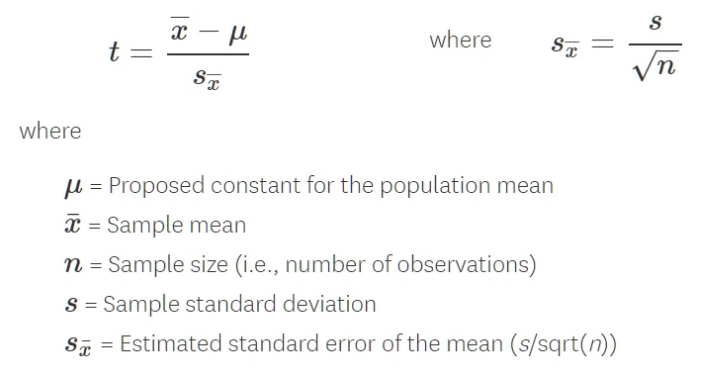

In [7]:
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
def test_p_value(p_value):
    if p_value < significance_level:
        print("Reject the null hypothesis, there is a difference between population mean and sample mean")
    else:
        print("Accept the null hypothesis, there is no difference between population mean and sample mean")

In [8]:
ages_mean = np.mean(ages)
ages_mean

30.34375

In [9]:
# Take a sample
sample_size = 10
age_sample = np.random.choice(ages, sample_size)
age_sample

array([23, 20, 55, 30, 65, 50, 16, 55, 17, 40])

In [10]:
from scipy.stats import ttest_1samp

In [11]:
t_test, p_value = ttest_1samp(age_sample, ages_mean)
significance_level = 0.05
print(t_test, p_value)
print(test_p_value(p_value))

1.1731730369303535 0.2708392414683396
Accept the null hypothesis, there is no difference between population mean and sample mean
None


## Consider the age of students in college and in Class A

In [12]:
np.random.seed(6)
school_ages = stats.poisson.rvs(loc=18, mu=35, size=1500) # mu is mean
classA_ages = stats.poisson.rvs(loc=18, mu=25, size=60)
print(classA_ages.mean())
print(school_ages.mean())

42.083333333333336
53.303333333333335


In [13]:
_, p_value = stats.ttest_1samp(a=classA_ages, popmean=school_ages.mean())
print(p_value)
print(test_p_value(p_value))

3.1561418385474138e-24
Reject the null hypothesis, there is a difference between population mean and sample mean
None


In [14]:
## Cast the mu (mean) to be both the same '35', the null hypothesis will NOT be rejected, aka accepted as truth
school_ages2 = stats.poisson.rvs(loc=18, mu=35, size=1500) # mu is mean
classA_ages2 = stats.poisson.rvs(loc=18, mu=35, size=60)
print(classA_ages2.mean())
print(school_ages2.mean())
_, p_value = stats.ttest_1samp(a=classA_ages2, popmean=school_ages2.mean())
print(p_value)
print(test_p_value(p_value))

52.166666666666664
53.24333333333333
0.1573371802864444
Accept the null hypothesis, there is no difference between population mean and sample mean
None


## Two sample T-Test

- The independent Samples T-Test or Two Sample T-Test compares the means of 2 independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The independent samples T-Test is a parametric test. This test is also known as **independent T-Test**

<img src="../images/Independent T-Test.jpg" style="height:300px;width=100px">

In [16]:
np.random.seed(12)
classB_ages = stats.poisson.rvs(loc=18, mu=33, size=60)
classB_ages.mean()
_, p_value = stats.ttest_ind(a = classA_ages, b=classB_ages, equal_var=False)
print(p_value)
print(test_p_value(p_value))

1.64752207461009e-13
Reject the null hypothesis, there is a difference between population mean and sample mean
None


## Paired T-Test
- When you want to check how different samples from the same group are

In [17]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
# Add some normal distribution value
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [18]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [19]:
weight_df = pd.DataFrame({
    "weight_1": np.array(weight1),
    "weight_2": np.array(weight2),
    "weight_change": np.array(weight2) - np.array(weight1)
})
print(weight_df)

    weight_1   weight_2  weight_change
0         25  30.579265       5.579265
1         30  34.910224       4.910224
2         28  29.004446       1.004446
3         35  30.542951      -4.457049
4         28  19.862020      -8.137980
5         34  37.578732       3.578732
6         26  18.329983      -7.670017
7         29  21.377139      -7.622861
8         30  36.364209       6.364209
9         26  32.059412       6.059412
10        28  26.938280      -1.061720
11        32  29.519014      -2.480986
12        31  26.428512      -4.571488
13        30  30.506678       0.506678
14        45  41.329843      -3.670157


In [20]:
_, p_value = stats.ttest_rel(a=weight1, b=weight2)
print(p_value)
print(test_p_value(p_value))

0.5732936534411279
Accept the null hypothesis, there is no difference between population mean and sample mean
None


## Covariance

- $\Large Cov (x, y) = \frac {\Sigma(X_i - \bar{X})(Y_j - \bar{Y})}{n - 1} $
- Covariance indicates the direction of the linear relationship between variables.
- If Covariance is +ve, as X increases Y increases
- If Covariance is -ve, as X increases Y decreases

## Correlation

<img src="../images/Correlation Coefficient.jpg" style="height:200px;width=80px">

- Pearson Correlation Coefficient = $\huge \frac {Cov(X, Y)} {\sigma x  \times \sigma y} $

- Correlation measures BOTH the strength and direction of the linear relationship between two variables
- Since we divide by standard deviation of x and y, we can measure the STRENGTH of the correlation
- Value ranges from -1 to 1, 
 - -1 $\leq$ r $\leq$ 1
- Does not depend on the scale of the data
- Correlation equals 1 when straight line with positive slope can go through ALL of the data point
- Correlation equals -1 when straight line with negative slope can go through ALL of the data point
- Confidence in our guess $\large \rho$ depends on how much data we have.
 - If a lot of data, we have a lot of confidence in the guess as p value would be small
 - If less data, we have less confidence in the guess as p value would be larger
- Used in feature selection, if the correlation is 1, the 2 features are same, so we can drop 1 of the features

In [25]:
df=sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# Values will range from -1 to 1
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


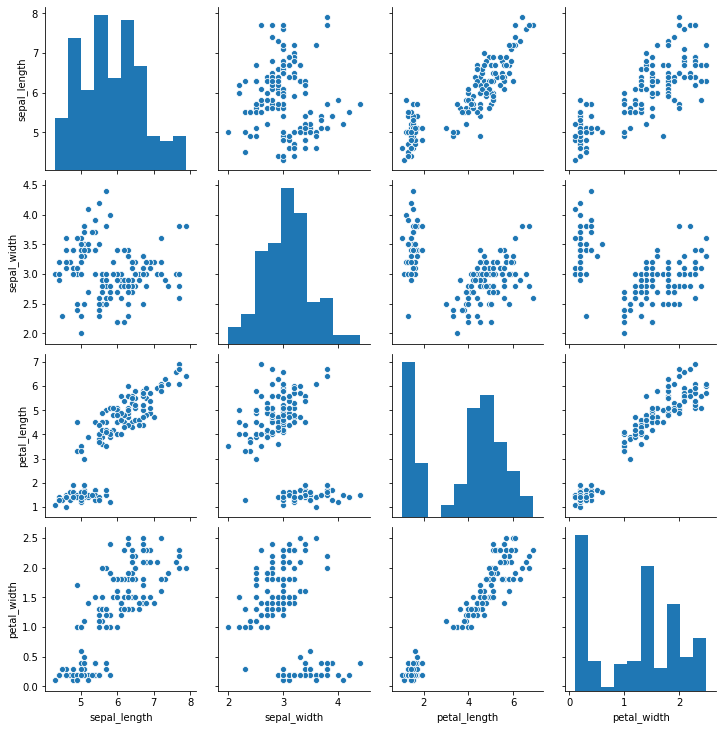

In [29]:
sns.pairplot(df)